In [164]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [165]:
df = pd.read_csv('breast_cancer.csv')

In [166]:
df = df.drop(df.columns[0], axis=1)

In [167]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

mean_concave_points       0
mean_perimeter            0
mean_fractal_dimension    0
worst_perimeter           0
worst_texture             0
worst_area                0
target                    0
dtype: int64


In [168]:
df

,mean_concave_points,mean_perimeter,mean_fractal_dimension,worst_perimeter,worst_texture,worst_area,target
0,0.14710,122.80,0.07871,184.60,17.33,2019.0,0
1,0.07017,132.90,0.05667,158.80,23.41,1956.0,0
2,0.12790,130.00,0.05999,152.50,25.53,1709.0,0
3,0.10520,77.58,0.09744,98.87,26.50,567.7,0
4,0.10430,135.10,0.05883,152.20,16.67,1575.0,0
...,...,...,...,...,...,...,...
564,0.13890,142.00,0.05623,166.10,26.40,2027.0,0
565,0.09791,131.20,0.05533,155.00,38.25,1731.0,0
566,0.05302,108.30,0.05648,126.70,34.12,1124.0,0
567,0.15200,140.10,0.07016,184.60,39.42,1821.0,0


In [169]:
# Criando uma lista com as colunas da tabela (exceto "target")

colunas = df.columns.tolist()
colunas.remove('target')

In [170]:
# Percorrendo a tabela para calcular as metricas relativas a cada coluna

estatisticas = []
for coluna in colunas:
    minimo = df[coluna].min()
    maximo = df[coluna].max()
    media = df[coluna].mean()
    mediana = df[coluna].median()
    moda = df[coluna].mode().iloc[0] if not df[coluna].mode().empty else None
    desvio_medio_absoluto = df[coluna].apply(lambda x: abs(x - df[coluna].mean())).mean()
    variancia = df[coluna].var()
    desvio_padrao = df[coluna].std()
    correlacao_pearson = df[coluna].corr(df['target'])
    correlacao_spearman = df[coluna].corr(df['target'], method='spearman')
    correlacao_kendall = df[coluna].corr(df['target'], method='kendall')
    estatisticas.append([coluna, minimo, maximo, media, mediana, moda, desvio_medio_absoluto, variancia, desvio_padrao, correlacao_pearson, correlacao_spearman, correlacao_kendall])

In [171]:
# Criando um df com os dados gerados

colunas_tabela = ['Coluna', 'Mínimo', 'Máximo', 'Média', 'Mediana', 'Moda', 'Desvio Médio Absoluto', 'Variância', 'Desvio Padrão', 'Pearson', 'Spearman', 'Kendall']
tabela_estatisticas = pd.DataFrame(estatisticas, columns=colunas_tabela)

In [172]:
tabela_estatisticas

,Coluna,Mínimo,Máximo,Média,Mediana,Moda,Desvio Médio Absoluto,Variância,Desvio Padrão,Pearson,Spearman,Kendall
0,mean_concave_points,0.00000,0.20120,0.048919,0.03350,0.00000,0.031460,0.001506,0.038803,-0.776614,-0.777877,-0.635873
1,mean_perimeter,43.79000,188.50000,91.969033,86.24000,82.61000,19.032578,590.440480,24.298981,-0.742636,-0.748496,-0.611775
2,mean_fractal_dimension,0.04996,0.09744,0.062798,0.06154,0.05667,0.005306,0.000050,0.007060,0.012838,0.025903,0.021173
3,worst_perimeter,50.41000,251.20000,107.261213,97.66000,101.70000,26.465437,1129.130847,33.602542,-0.782914,-0.796319,-0.650879
4,worst_texture,12.02000,49.54000,25.677223,25.41000,17.70000,4.911825,37.776483,6.146258,-0.456903,-0.476720,-0.389654
5,worst_area,185.20000,4254.00000,880.583128,686.50000,284.40000,423.879453,324167.385102,569.356993,-0.733825,-0.786902,-0.643117


In [173]:
# Valores de mediana abaixo da média indicam a exstência de mais valores mais altos acima da mediana, com possíveis outliers.
# Altos valores de desvio médio absoluto e desvio padrão para "mean_concave_points" e "worst_area" indicam novamente para uma maior dispersão de valores, com prováveis outliers, sobretudo no caso da variável "worst_area".
# Coeficientes de correlação indicam para uma relação entre o aumento do valor das variáveis e a ocorrência de tumores malignos, exceto no caso da variável "mean_fractal_dimension".

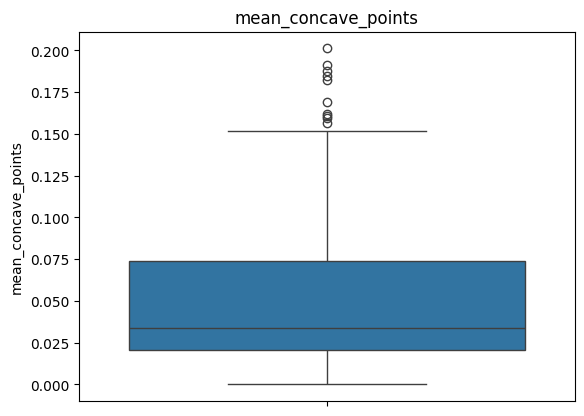

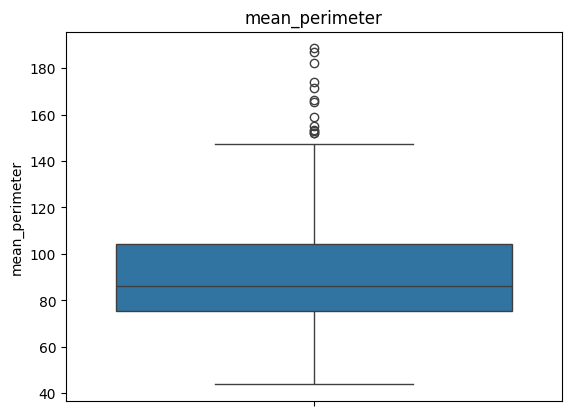

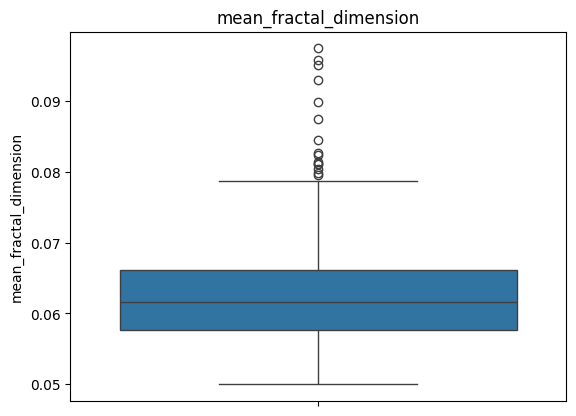

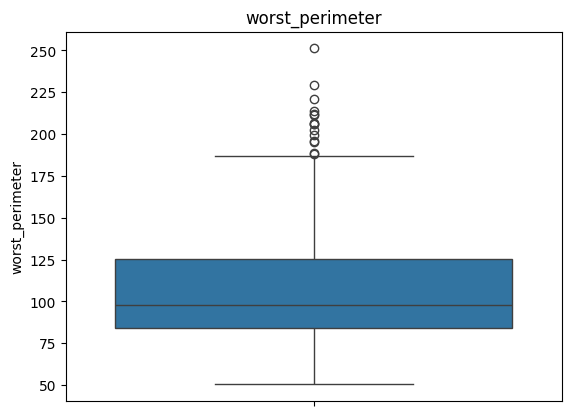

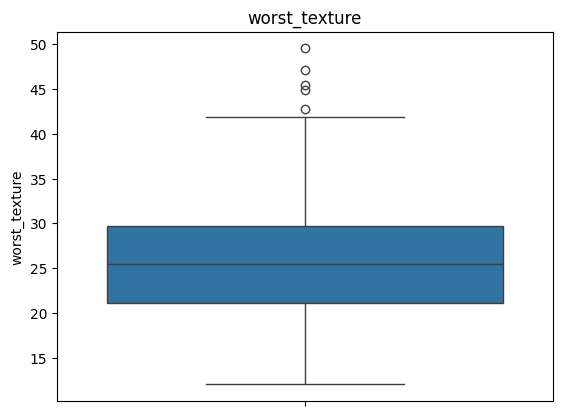

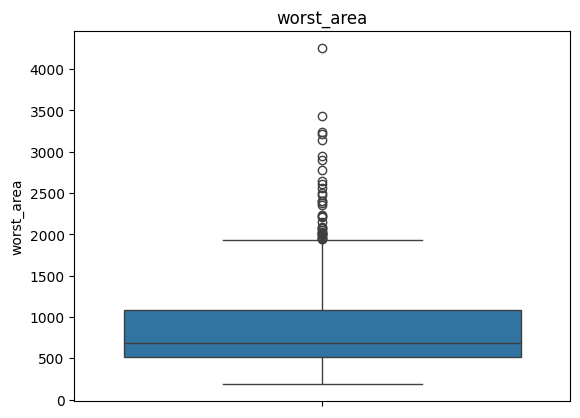

In [174]:
# Boxplot para Visualização da Distribuição das Variáveis Contínuas

for coluna in colunas:
    sns.boxplot(data=df[coluna])
    plt.title(f'{coluna}')
    plt.show()

In [175]:
# Distribuição de valores bate com as conclusões retiradas das métricas estudadas: valores acima da mediana apresentam um desvio maior, com diversas outliers positivas.
# Caso mais notável é o da variável "worst_area", que apresenta elevado número de outliers positivas.

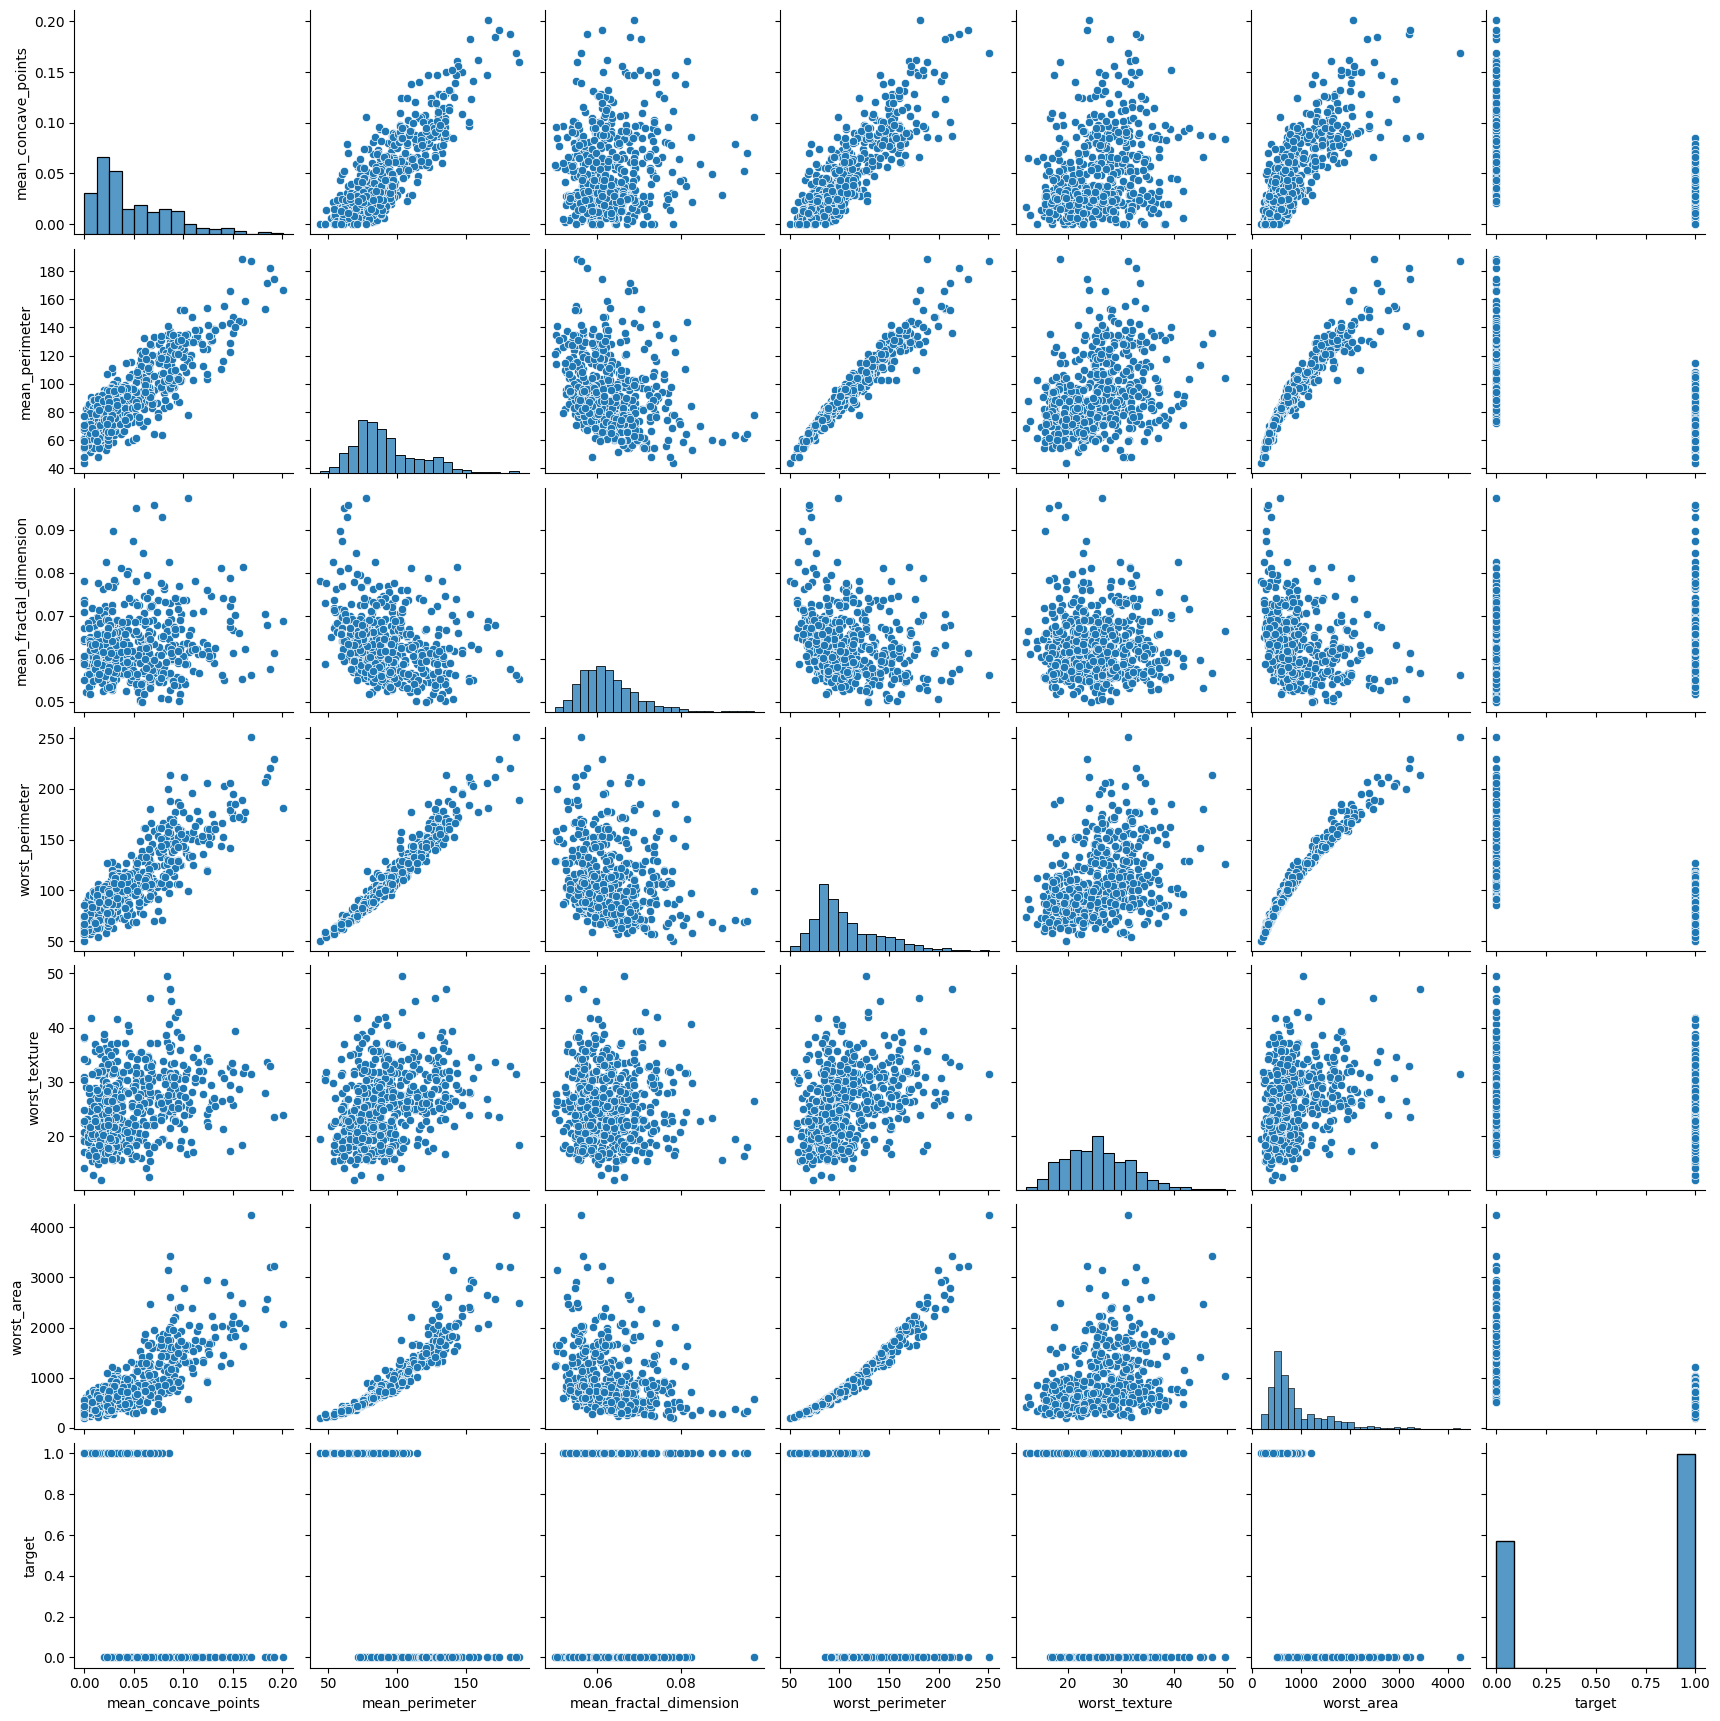

In [176]:
# Pairplot para a identifcação de relações entre as variáveis

colunas.append('target')
sns.pairplot(df[colunas])
plt.show()

In [177]:
# A anlálise dos gráficos indica uma forte correlação positiva entre os seguintes pares de variáveis: "worst_area" e "mean_perimeter", "worst_area" e "worst_perimeter", "worst_perimeter" e "mean_perimeter".
# Certa correlação positiva entre os seguintes pares de variáves: "worst_area" e "mean_concave_points", "worst_perimeter" e "mean_concave_points", "mean_perimeter" e "mean_concave_points".
# As variáveis "worst_texture" e "mean_fractal_dimension" não apresentam aparente correlação com as demais.
# Em todos os casos, exceto no caso da variável "mean_fractal_dimension", o gráfico comprova que o aumento dos valores registrados é acompanhado de uma maior incidência de tumores malignos (quanto maiores os valores, maior a incidência de valores "0" na coluna "target").

In [178]:
# Conclusão:

# Os estudos conduzidos até aqui apontam para uma correlação positiva entre todas as variáveis exceto "mean_fractal_dimension" na ocorrência de tumores malignos.
# A variável "worst_area" é aquela com a maior dispersão de valores, notadamente com um alto número de outliers positivos, o que pode indicar uma forte influência desses valores na ocorrência de tumorea malignos.
# As variáveis "worst_area,e "mean_perimeter" e "worst_perimeter" apresentam forte correlação positiva entre si, o que aponta para um estudo mais aprofundado sobre a influência conjunta dessas três variáveis na ocorrência de tumores malignos.

In [179]:
# Regressão Linear

In [180]:
# Definindo as variáveis
X = df[['mean_concave_points', 'mean_perimeter', 'mean_fractal_dimension', 'worst_perimeter', 'worst_texture', 'worst_area']]
y = df['target']

In [181]:
# Adicionando a constante (interceptação) manualmente
X = sm.add_constant(X)

In [182]:
# Ajustando o modelo de regressão OLS com a constante
modelo = sm.OLS(y, X).fit()

In [183]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     226.7
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.76e-146
Time:                        23:00:04   Log-Likelihood:                -44.050
No. Observations:                 569   AIC:                             102.1
Df Residuals:                     562   BIC:                             132.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [184]:
# Conclusão:

# Os valores de R-squared e de R-squsred ajustado apontam que as variáveis preditorass escolhidas respondem por 70% da variação dos resultados observados nos tumores, ou seja, existe de fato uma forte correlação. Também apontam que não há variáveis excedentes no modelo, ou seja, que não influenciariam o resultado.
# Os p-valores apresentados apontam que as variáveis estudadas são altamente significativas, sendo a variável "mean_perimeter" estatisticamente significativa.
# Como esperado, a variável "mean_fractal_dimension" apresentou um p-valor alto, apontando para a hipótese de que não se trata de um fator altamente relevante.
# Conforme esperado com base nas análises anteriores, as variáveis com coeficientes negativos ("mean_concave_points", "worst_perimeter", "worst_texture") estão associadas a uma diminuição do valor da coluna "target", ou seja, a uma maior ocorrência de tumores malignos.
# Ao contrário do que se esperava, no entanto, as variáveis com coeficientes positivos ("mean_perimeter", "worst_area") estão associadas a um aumento do valor da coluna "target", ou seja, a uma maior ocorrência de tumores benignos.
# A variável "mean_concave_points" é a que exerce a maior influência, contribuindo negativamente para o valor da coluna "target", ou seja, contribuindo positivamente para a ocorrência de tumores malignos.
# Conclui-se que todas as variáveis analisadas são variáveis preditoras significativas, com exeão de "mean_fractal_dimension", esta sim uma variável com significância marginal.

In [185]:
# Regressão lógica

In [186]:
# Definindo as variáveis
x = df[['mean_concave_points', 'mean_perimeter', 'mean_fractal_dimension', 'worst_perimeter', 'worst_texture', 'worst_area']]
y = df['target']

In [187]:
# Adicionar a constante (interceptação) manualmente
x = sm.add_constant(x)

In [188]:
# Construindo o modelo
modelo = sm.GLM(y, x, family=sm.families.Binomial())
resultado = modelo.fit()

In [189]:
# Exibindo o resumo dos resultados
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  569
Model:                            GLM   Df Residuals:                      562
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.101
Date:                Sun, 26 Jan 2025   Deviance:                       80.202
Time:                        23:00:04   Pearson chi2:                 4.51e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6926
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [ ]:
# Conclusão:

# O modelo de regressão lógica apresenta um valor maior de "Log-Likelihood", indicando um ajuste melhor do modelo aos dados analisados.
# O valor do "Pseudo R-squared (CS)" na casa dos 70% bate com o modelo anterior, indicando uma boa correlação entre as variáveis estudadas.
# Com esse modelo, consolida-se a hipótese de que a variável "mean_concave_points" exerce enorme influência da ocorrência de tumores malignos, conforme apontam o p-valor e o coeficiente revelados pela regressão.
# Em relação às demais variáveis, destacam-se "mean_perimeter", "worst_texture" e "worst_area" como altamente significativas, com forte influência sobre a natureza do tumor.
# Diferentemente do modelo anterior, a variável "worst_perimeter" é apontada como tendo pouca influência na natureza do tumor.
# A variável "mean_fractal_dimension", conforme indicado também no modelo anterior, também não exerce influência significativa sobre a natureza do tumor.
# Ao contrário do indicado no modelo anterior, a variável "mean_perimeter" é apontada como tendo influência positiva sobre o valor "target", ou seja, seu aumento está correlacionado a tumores de natureza benigna.
# Da mesma forma, ao contrário do que indicou a regressão linear, a variável "worst_area" é apontada como tendo influência positiva na ocorrência de tumores malignos.

In [ ]:
# Conclusão final:

# Os valores de pontos côncavos médios se apresentam como o fator que mais influencia na ocorrência de tumores malignos.
# Os valores de pior textura também exercem forte influência na natureza do tumor, tendo sido apontados como fatores positivamente ligados a tumores malignos em ambos os estudos de regressão.
# Os valores de perímetro médio e pior área também exercem influência na natureza do tumor, mas os estudos conduzidos trazem informações conflitantes quanto à natureza dessa influência (positiva ou negativa).
